AIDI 1100 AI Development

Project

--- 

Group 4:  
- Ryan Shaw 
- Pruthvi Patel 
- Nick Elliot 
- Arunpriya Gobinath
- Nishith Patel


In [ ]:
# Installing required libraries

! pip install beautifulsoup4
! pip install requests

# Part #1: Importing libraries and Scanning website


In [ ]:
# importing the necessary packages
import requests
import numpy as np
from bs4 import BeautifulSoup
import datetime
from datetime import timedelta, date

In [ ]:
# Scanning the news data from the given URL
news = []
url = 'https://www.prnewswire.com/news-releases/automotive-transportation-latest-news/airlines-aviation-list/'

# Scanning 10 pages from the website and storing in news list
for i in range(10):
  new_url = url + "?page={num}&pagesize=100".format(num = i+1)
  r1 = requests.get(new_url)
  news.append(r1.content)

In [ ]:
# Appending all the scanned pages in one list
all_news = []

# Extracting the tags with hyperlinks of news articles and appeding them in a list
for i in range(10):
  soup1 = BeautifulSoup(news[i], 'html5lib')
  all_news.append(soup1.find_all('div', class_='row arabiclistingcards')) # getting all the div tags with given class

# Displaying appended data
all_news 

In [ ]:
# Combining all the extracted data
for i in range(1, 10):
  all_news[0].extend(all_news[i])
all_news = all_news[0]

In [ ]:
# displaying length
len(all_news)

In [ ]:
# Getting first element from the list
all_news[0]

# Part #2: Data Parsing and Storage

In [ ]:
# Scraping the first 100 articles
number_of_articles = 100
i=1
news_contents = []
list_links = []
list_titles = []


# Getting the data from last 5 days
for i in range(100):
  today =  date.today() - timedelta(days=5)
  
  # Getting the links of the articles
  link = 'https://www.prnewswire.com' + all_news[i].find('a')['href']

  #storing all the links in list
  list_links.append(link)

  # Getting the title of the article
  title = all_news[i].find('a').get_text()

  #storing all the titles in a list
  list_titles.append(title)
  
  # Reading the content (it is divided in paragraphs)
  article = requests.get(link)
  article_content = article.content
  soup_article = BeautifulSoup(article_content, 'html.parser')
  body = soup_article.find_all('div', class_='col-sm-10 col-sm-offset-1')
  #storing all the content from articles
  x = body[0].find_all('p')
  
  # Unifying the paragraphs
  list_paragraphs = []
  for p in np.arange(0, len(x)):
      paragraph = x[p].get_text()
      list_paragraphs.append(paragraph)
      final_article = " ".join(list_paragraphs)
      
  news_contents.append(final_article)

In [ ]:
# Printing news number 3
news_contents[2]

In [ ]:
import pandas as pd

#Storing of the data collected from the website in a dataframe
data_frame = pd.DataFrame({'Link':list_links, 'title':list_titles, 'Content':news_contents})

In [ ]:
data_frame.head()

,Link,title,Content
0,https://www.prnewswire.com/news-releases/embra...,"\n\nDec 04, 2021, 10:05 ET\nEMBRAER S.A.: Embr...","MELBOURNE, Fla., Dec. 4, 2021 /PRNewswire/ -- ..."
1,https://www.prnewswire.com/news-releases/south...,"\n\n\n\n\n\n\n\n\n\n\nDec 03, 2021, 16:45 ET\n...","DALLAS, Dec. 3, 2021 /PRNewswire/ -- Southwest..."
2,https://www.prnewswire.com/news-releases/teams...,"\n\n\n\n\n\n\n\n\n\n\nDec 03, 2021, 14:02 ET\n...","WASHINGTON, Dec. 3, 2021 /PRNewswire/ -- On No..."
3,https://www.prnewswire.com/news-releases/unite...,"\n\nDec 03, 2021, 10:05 ET\nUnited Takes Pilot...","CHICAGO, Dec. 3, 2021 /PRNewswire/ -- United A..."
4,https://www.prnewswire.com/news-releases/enter...,"\n\n\n\n\n\n\n\n\n\n\nDec 03, 2021, 08:46 ET\n...","ST. LOUIS, 3 de diciembre de 2021 /PRNewswire..."


# Part #3: Stocks of Interest

In [ ]:
import re as reg

In [ ]:
tickers = []

In [ ]:
#Here the for loop will loop through the dataframe and pull all values that have capital letters 
#and more then two letters. We have also limited it to be less then 4 letters.
for i in range(len(data_frame)):
  tickers = tickers + reg.findall(r'\b[A-Z]{2,4}\b', data_frame.iloc[i]['title'])
  tickers = tickers + reg.findall(r'\b[A-B]{2,4}\b', data_frame.iloc[i]['Content'])

tickers = list(set(tickers))

In [ ]:
print('Tickers:', tickers)

Tickers: ['LTM', 'AFRL', 'AI', 'OGMA', 'HR', 'TD', 'WT', 'LUV', 'SABR', 'TAMC', 'RTX', 'CAGR', 'AM', 'GBT', 'FMS', 'NYSE', 'JBT', 'FFS', 'NEOM', 'US', 'JV', 'AS', 'XO', 'ISM', 'PM', 'NASA', 'NLR', 'FETT', 'LCI', 'IP', 'CVM', 'ERJ', 'HON', 'NOR', 'AA', 'GTF', 'GAP', 'FTD', 'PETS', 'ACY', 'HA', 'BGI', 'BSN', 'SSE', 'LLC', 'BMV', 'CEA', 'RF', 'UAM', 'ET', 'UN', 'SSP', 'YOU', 'IPTK', 'CEO', 'JFK', 'EAS', 'FOR', 'DAL', 'ID', 'GE', 'AZ', 'ALGT', 'MRO', 'FAA', 'OIAA', 'VSAT', 'USD', 'FBS', 'GEO', 'PMI']


In [ ]:
!pip install yfinance 

In [ ]:
import yfinance as yahf

In [ ]:
#Here we are creating the variables for each ticker we selected from the articles. 
#We have chosen E.W Scripps Company (SSP), AeroCentury Corp. (ACY), and Delta Airlines (DAL).
SSP = yahf.Ticker("SSP") 
ACY = yahf.Ticker("ACY")
DAL = yahf.Ticker("DAL")

In [ ]:
#Here we are gathering the historical data for one month for the stock SSP. 
print(SSP.info)

hist_SSP = SSP.history(period="1mo") #Here the historical information for one month is being stored in a variable hist_SSP
SSP_stock = pd.DataFrame(hist_SSP) #The stock information is then made into a dataframe for presentation and stored in a variable SSP_stock
SSP_stock

In [ ]:
#Here we are gathering the historical data for one month for the stock ACY. 
print(ACY.info)

hist_ACY = ACY.history(period="1mo")#Here the historical information for one month is being stored in a variable hist_ACY
ACY_stock = pd.DataFrame(hist_ACY)#The stock information is then made into a dataframe for presentation and stored in a variable ACY_stock
ACY_stock

In [ ]:
#Here we are gathering the historical data for one month for the stock DAL. 
print(DAL.info)

hist_DAL = DAL.history(period = "1mo")#Here the historical information for one month is being stored in a variable hist_DAL
DAL_stock = pd.DataFrame(hist_DAL)#The stock information is then made into a dataframe for presentation and stored in a variable ACY_stock
DAL_stock

## Part 4: Visualizations

In [ ]:
import plotly.graph_objects as plty
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
SSP_graph2 = make_subplots(specs= [[{"secondary_y": True}]]) #This will allow me to create two different graphs on the same grid.

SSP_graph2.add_trace(plty.Scatter(x=SSP_stock.index,y=SSP_stock['Close'],name='Closing Price'), secondary_y=False)#Here I am making the graph that shows the stock closing price.
SSP_graph2.add_trace(plty.Bar(x=SSP_stock.index,y=SSP_stock['Volume'],name ='Volume'),secondary_y=True)#This is the creation of the bar chart for the volume. 

SSP_graph2.update_layout(title_text='SSP Closing Stock Price and Volume', plot_bgcolor='white')
SSP_graph2.update_xaxes(title_text='Date')
SSP_graph2.update_yaxes(title_text='Stock Price ($)', secondary_y=False)
SSP_graph2.update_yaxes(title_text='Volume', secondary_y=True)


#The gaps in the bar chart are due to weekends and holidays. Stock market is not open during these days therefore there are no data points. 
SSP_graph2.show()



In [ ]:
ACY_graph2 = make_subplots(specs= [[{"secondary_y": True}]]) #This will allow me to create two different graphs on the same grid.

ACY_graph2.add_trace(plty.Scatter(x=ACY_stock.index,y=ACY_stock['Close'],name='Price'), secondary_y=False)#Here I am making the graph that shows the stock closing price.
ACY_graph2.add_trace(plty.Bar(x=ACY_stock.index,y=ACY_stock['Volume'],name ='Volume'),secondary_y=True)#This is the creation of the bar chart for the volume. 

ACY_graph2.update_layout(title_text='ACY Closing Stock Price and Volume', plot_bgcolor='white')
ACY_graph2.update_xaxes(title_text='Date')
ACY_graph2.update_yaxes(title_text='Stock Price ($)', secondary_y=False)
ACY_graph2.update_yaxes(title_text='Volume', secondary_y=True)

#The gaps in the bar chart are due to weekends and holidays. Stock market is not open during these days therefore there are no data points.
ACY_graph2.show()

In [ ]:
DAL_graph2 = make_subplots(specs= [[{"secondary_y": True}]])#This will allow me to create two different graphs on the same grid.


DAL_graph2.add_trace(plty.Scatter(x=DAL_stock.index,y=DAL_stock['Close'],name='Price'), secondary_y=False)#Here I am making the graph that shows the stock closing price.
DAL_graph2.add_trace(plty.Bar(x=DAL_stock.index,y=DAL_stock['Volume'],name ='Volume'),secondary_y=True)#This is the creation of the bar chart for the volume. 

DAL_graph2.update_layout(title_text='DAL Closing Stock Price and Volume', plot_bgcolor='white')
DAL_graph2.update_xaxes(title_text='Date')
DAL_graph2.update_yaxes(title_text='Stock Price ($)', secondary_y=False)
DAL_graph2.update_yaxes(title_text='Volume', secondary_y=True)

#The gaps in the bar chart are due to weekends and holidays. Stock market is not open during these days therefore there are no data points.
DAL_graph2.show()

In [ ]:
#Candlestick Chart 
candle_SSP = plty.Figure(data=[plty.Candlestick(x=SSP_stock.index,        #The Candlestick chart utilizes the high price, low price, closing price and opening price of the stock.
                                                open =SSP_stock['Open'],  #The red candlesticks signifiy that the closing price was lower then the opening price. 
                                                close =SSP_stock['Close'],#The green candlesticks signifiy that the closing price was higher than the opening price. 
                                                high = SSP_stock['High'], #The wicks at the top and bottom of the candlestick show the high price and the low price for that day. 
                                                low = SSP_stock['Low'])])
candle_SSP.update_layout(
    title = 'E.W Scripps Company Stock',
    yaxis_title = 'SSP Stock Price ($)',
    xaxis_title = 'Date'
)

In [ ]:
candle_ACY = plty.Figure(data=[plty.Candlestick(x=ACY_stock.index,          #The Candlestick chart utilizes the high price, low price, closing price and opening price of the stock.
                                                open =ACY_stock['Open'],    #The red candlesticks signifiy that the closing price was lower then the opening price.
                                                close =ACY_stock['Close'],  #The green candlesticks signifiy that the closing price was higher than the opening price.
                                                high = ACY_stock['High'],   #The wicks at the top and bottom of the candlestick show the high price and the low price for that day.
                                                low = ACY_stock['Low'])])
candle_ACY.update_layout(
    title = 'AeroCentury Corp. Stock',
    yaxis_title = 'ACY Stock Price ($)',
    xaxis_title = 'Date'
)

In [ ]:
candle_DAL = plty.Figure(data=[plty.Candlestick(x=DAL_stock.index,           #The Candlestick chart utilizes the high price, low price, closing price and opening price of the stock.
                                                open =DAL_stock['Open'],     #The red candlesticks signifiy that the closing price was lower then the opening price.
                                                close =DAL_stock['Close'],   #The green candlesticks signifiy that the closing price was higher than the opening price. 
                                                high = DAL_stock['High'],    #The wicks at the top and bottom of the candlestick show the high price and the low price for that day.
                                                low = DAL_stock['Low'])])
candle_DAL.update_layout(
    title = 'Delta Airlines Stock',
    yaxis_title = 'DAL Stock Price ($)',
    xaxis_title = 'Date'
)

# Part 5: Stock Recommendation

In [ ]:
#Function to retrieve stock history given the ticker symbol and lenght of period the data needs to be retrieved
def retrieve_stock_data(symbol, time):
    stock = yahf.Ticker(symbol)
    stock_hist = stock.history(period=time)
    data = pd.DataFrame(stock_hist)
    return data

In [ ]:
#Function to find stock volatility in percentage given the stock data
def stock_volatility(stock_list):
    closing = stock_list['Close']
    mean = closing.mean()
    stdev = closing.std()
    per_deviation = (stdev/mean)*100
    return per_deviation

In [ ]:
import matplotlib.dates as mdates

#Function to recommend if the stock should be bought and plot Moving average trend
def stock_recommender(stock_list): 
    short_window = 5
    long_window = 30
    if(len(stock_list)>long_window):
        Short_SMA = sum(stock_list.tail(short_window)['Close'])/short_window #5 Day average of stock price
        Long_SMA = sum(stock_list.tail(long_window)['Close'])/long_window #30 Day average of stock price
        volatility = stock_volatility(stock_list)  #Finding volatility percentage
        if(volatility > 10): #Highly volatile stock
            result = "WAIT BEFORE BUYING STOCK!"
        elif(Short_SMA > Long_SMA): #Well performing stock
            result = "BUY STOCK!"
        else: #Stock is not performing well in the market
            result = "DON'T BUY STOCK!"
    
    #Plotting Simple moving average trend for short (5 day) and long (30 day) windows
    short_rolling = stock_list.rolling(window=5).mean() #Simple moving average for 5 days
    long_rolling = stock_list.rolling(window=30).mean() #Simple moving average for 30 days
    
    start_date = "2020-12-04"
    end_date = "2021-12-03"
    my_year_month_fmt = mdates.DateFormatter('%m/%y')

    fig, ax = plt.subplots(figsize=(20,9))

    #plotting the graph for SMA trend
    ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')
    ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '5-days SMA')
    ax.legend(loc='best')
    ax.set_ylabel('Price in $')
    ax.xaxis.set_major_formatter(my_year_month_fmt)
    return result

"DON'T BUY STOCK!"

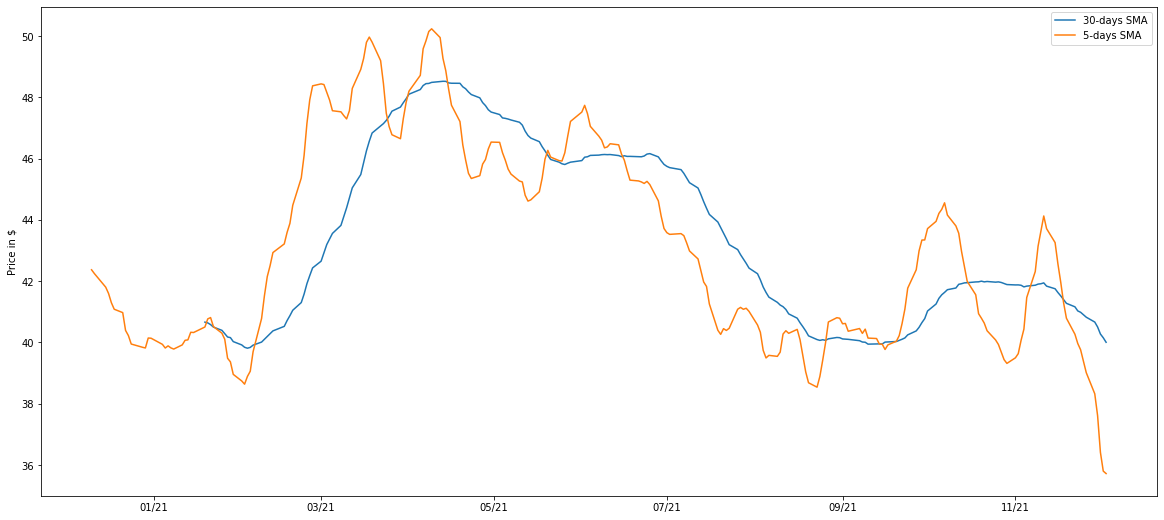

In [ ]:
DAL_LongHist= retrieve_stock_data("DAL","12mo")
stock_recommender(DAL_LongHist)

'WAIT BEFORE BUYING STOCK!'

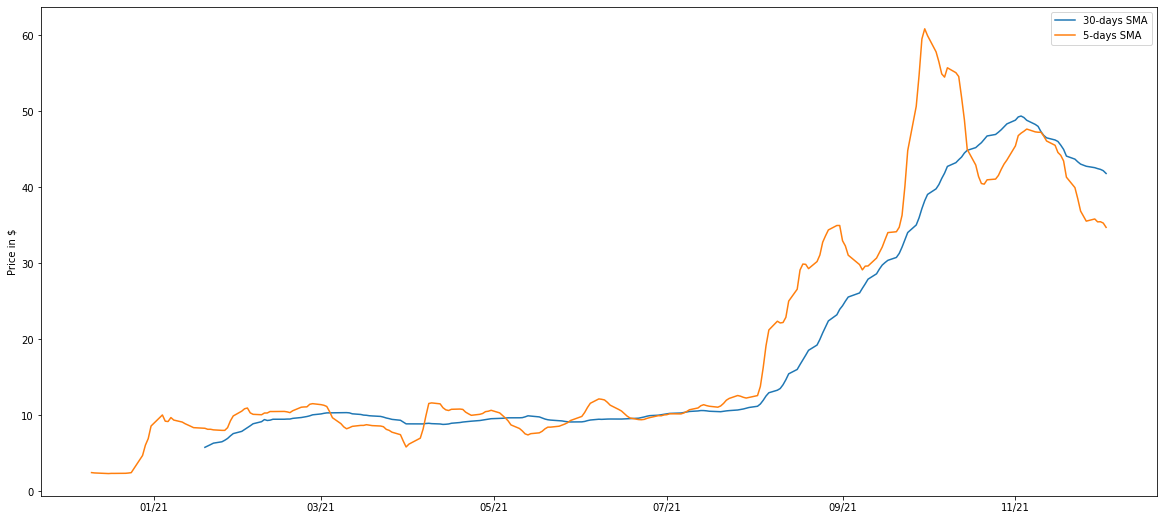

In [ ]:
ACY_LongHist= retrieve_stock_data("ACY","12mo")
stock_recommender(ACY_LongHist)

'WAIT BEFORE BUYING STOCK!'

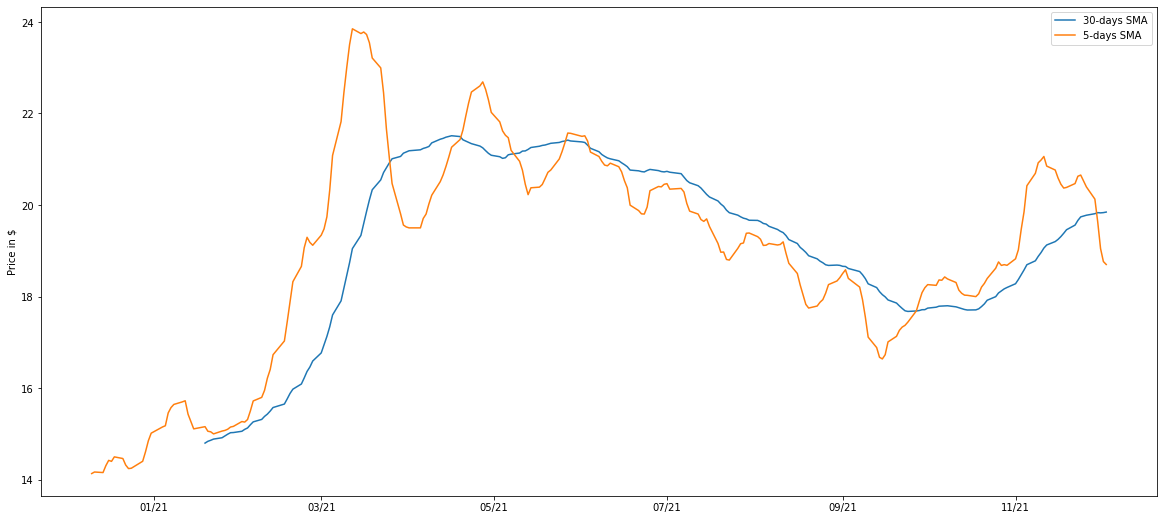

In [ ]:
SSP_LongHist= retrieve_stock_data("SSP","12mo")
stock_recommender(SSP_LongHist)

'BUY STOCK!'

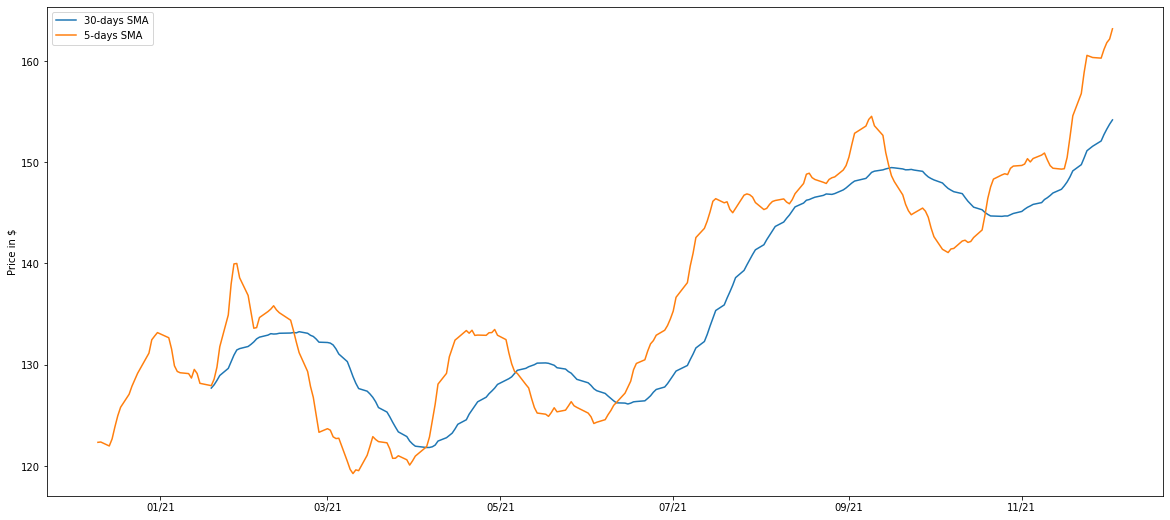

In [ ]:
AAPL_LongHist = retrieve_stock_data("AAPL","12mo")
stock_recommender(AAPL_LongHist)

#Part 5: Conclusion

According to above observations,
1. DAL stocks should not be bought now.
2. SSP and ACY stock trends needs to be observed further before buying.
3. AAPL stocks can be bought now.